# Raw Datasets Exploratory Data Analysis
This notebook performs a first EDA on the raw datasets contained in `.\datasets\raw\co2_emissions`.

### Step 0: Import and Read Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
pd.set_option('display.max_columns', 100)

In [2]:
df_co2_emissions_per_capita = pd.read_csv('./datasets/raw/co2_emissions/co2-emissions-per-capita.csv')
df_co2_emissions_by_region = pd.read_csv('./datasets/raw/co2_emissions/co2-emissions-by-region.csv')

---

### Step 1: Data Understanding
Dataframes `info()`, `head()` and `describe()`

(1) CO2 emissions per capita

In [3]:
df_co2_emissions_per_capita.info()

<class 'pandas.DataFrame'>
RangeIndex: 26509 entries, 0 to 26508
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Entity                    26509 non-null  str    
 1   Code                      23206 non-null  str    
 2   Year                      26509 non-null  int64  
 3   CO₂ emissions per capita  26509 non-null  float64
dtypes: float64(1), int64(1), str(2)
memory usage: 828.5 KB


In [4]:
df_co2_emissions_per_capita.head()

,Entity,Code,Year,CO₂ emissions per capita
0,Afghanistan,AFG,1949,0.001992
1,Afghanistan,AFG,1950,0.010837
2,Afghanistan,AFG,1951,0.011625
3,Afghanistan,AFG,1952,0.011468
4,Afghanistan,AFG,1953,0.013123


In [ ]:
#df_co2_emissions_per_capita.describe()

In [5]:
df_co2_emissions_per_capita.isna().sum()

Entity                         0
Code                        3303
Year                           0
CO₂ emissions per capita       0
dtype: int64

In [6]:
print(df_co2_emissions_per_capita[df_co2_emissions_per_capita['Code'].isna()]['Entity'].unique())

<StringArray>
[                       'Africa',                          'Asia',
  'Asia (excl. China and India)',                        'Europe',
          'Europe (excl. EU-27)',          'Europe (excl. EU-28)',
           'European Union (27)',           'European Union (28)',
         'High-income countries',          'Low-income countries',
 'Lower-middle-income countries',                 'North America',
     'North America (excl. USA)',                       'Oceania',
                 'South America', 'Upper-middle-income countries']
Length: 16, dtype: str


Here we can see that the rows that doesn't have a 'Code' value, are geographical regions (as confirmed by ["CO₂ emissions per capita"](https://ourworldindata.org/explorers/co2?hideControls=false&Gas+or+Warming=CO%E2%82%82&Accounting=Production-based&Fuel+or+Land+Use+Change=All+fossil+emissions&Count=Per+capita&country=CHN~USA~IND~GBR~OWID_WRL) on the Our World in Data website). They'll be separated from the country datasets and treated differently.  

---
(2) CO2 emissions by region (either a country or a geographical area)

In [7]:
df_co2_emissions_by_region.info()

<class 'pandas.DataFrame'>
RangeIndex: 29384 entries, 0 to 29383
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entity                29384 non-null  str    
 1   Code                  23714 non-null  str    
 2   Year                  29384 non-null  int64  
 3   Annual CO₂ emissions  29384 non-null  float64
dtypes: float64(1), int64(1), str(2)
memory usage: 918.4 KB


In [8]:
df_co2_emissions_by_region.head()

,Entity,Code,Year,Annual CO₂ emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [ ]:
# df_co2_emissions_by_region.describe()

In [9]:
df_co2_emissions_by_region.isna().sum()

Entity                     0
Code                    5670
Year                       0
Annual CO₂ emissions       0
dtype: int64

In [10]:
print(df_co2_emissions_by_region[df_co2_emissions_by_region['Code'].isna()]['Entity'].unique())

<StringArray>
[                       'Africa',                  'Africa (GCP)',
                          'Asia',                    'Asia (GCP)',
  'Asia (excl. China and India)',         'Central America (GCP)',
                        'Europe',                  'Europe (GCP)',
          'Europe (excl. EU-27)',          'Europe (excl. EU-28)',
           'European Union (27)',           'European Union (28)',
         'High-income countries',        'International aviation',
        'International shipping',       'Kuwaiti Oil Fires (GCP)',
          'Low-income countries', 'Lower-middle-income countries',
             'Middle East (GCP)',                'Non-OECD (GCP)',
                 'North America',           'North America (GCP)',
     'North America (excl. USA)',                    'OECD (GCP)',
                       'Oceania',                 'Oceania (GCP)',
          'Ryukyu Islands (GCP)',                 'South America',
           'South America (GCP)', 'Upper-middle-

Again, here we can see that the rows that doesn't have a 'Code' value, are geographical regions (as confirmed by ["CO₂ emissions per capita"](https://ourworldindata.org/explorers/co2?hideControls=false&Gas+or+Warming=CO%E2%82%82&Accounting=Production-based&Fuel+or+Land+Use+Change=All+fossil+emissions&Count=Per+capita&country=CHN~USA~IND~GBR~OWID_WRL) on the Our World in Data website). They'll be separated from the country datasets and treated differently.  

---

### Step 2: Data Preparation
- Drop irrelevant columns / rows
- Identify duplicated rows
- Renaming columns 
- Identify potential columns for merging datasets

In [ ]:
df_co2_emissions_per_capita = df_co2_emissions_per_capita.rename(columns={'CO₂ emissions per capita': 'CO2 emissions per capita'})
df_co2_emissions_by_region = df_co2_emissions_by_region.rename(columns={'Annual CO₂ emissions': 'Total CO2 emissions'})
df_co2_emissions_per_capita.columns
# df_co2_emissions_by_region.columns

Index(['Entity', 'Code', 'Year', 'CO2 emissions per capita'], dtype='str')

In [4]:
df_co2_emissions_merged = pd.merge(df_co2_emissions_per_capita, df_co2_emissions_by_region, on=['Entity', 'Code', 'Year'], how='outer')

In [7]:
df_co2_emissions_merged = df_co2_emissions_merged[df_co2_emissions_merged['Year'] > 1800]
df_co2_emissions_merged.head()

,Entity,Code,Year,CO2 emissions per capita,CO2 emissions by region
0,Afghanistan,AFG,1949,0.001992,14656.0
1,Afghanistan,AFG,1950,0.010837,84272.0
2,Afghanistan,AFG,1951,0.011625,91600.0
3,Afghanistan,AFG,1952,0.011468,91600.0
4,Afghanistan,AFG,1953,0.013123,106256.0


In [ ]:
df_co2_emissions_merged_countries = df_co2_emissions_merged[df_co2_emissions_merged['Code'].notna()]
df_co2_emissions_merged_continents = df_co2_emissions_merged[df_co2_emissions_merged['Code'].isna()]

In [ ]:
# df_co2_emissions_per_capita_by_country['Entity'].unique()
df_co2_emissions_merged_countries['Entity'].unique()

<StringArray>
[                       'Africa',                          'Asia',
  'Asia (excl. China and India)',                        'Europe',
          'Europe (excl. EU-27)',          'Europe (excl. EU-28)',
           'European Union (27)',           'European Union (28)',
         'High-income countries',          'Low-income countries',
 'Lower-middle-income countries',                 'North America',
     'North America (excl. USA)',                       'Oceania',
                 'South America', 'Upper-middle-income countries']
Length: 16, dtype: str

In [21]:
continents = ['Africa', 'Asia', 'Europe', 'North America','Oceania', 'South America']

income = ['High-income countries', 'Low-income countries',
          'Lower-middle-income countries', 'Upper-middle-income countries']

df_co2_emissions_per_capita_by_continents = df_co2_emissions_per_capita_by_region[
    df_co2_emissions_per_capita_by_region['Entity'].isin(continents)]
df_co2_emissions_per_capita_by_income = df_co2_emissions_per_capita_by_region[
    df_co2_emissions_per_capita_by_region['Entity'].isin(income)]

In [31]:
df_co2_emissions_per_country = df_co2_emissions_by_region[df_co2_emissions_by_region['Code'].notna()]
df_co2_emissions_per_continent = df_co2_emissions_by_region[df_co2_emissions_by_region['Entity'].isin(continents)]

Now 4 different dataframes have been created: 
- one for the emissions per capita by country
- one for the emissions per capita by region
- one for the emissions per country
- one for the emissions per region

### Step 3: Feature Understanding
Plotting Feature Distributions (Histograms, Time Series)

### 3.1 Emissions per Continent

In [34]:
df_co2_emissions_per_continent.columns

Index(['Entity', 'Code', 'Year', 'CO2 emissions by region'], dtype='str')

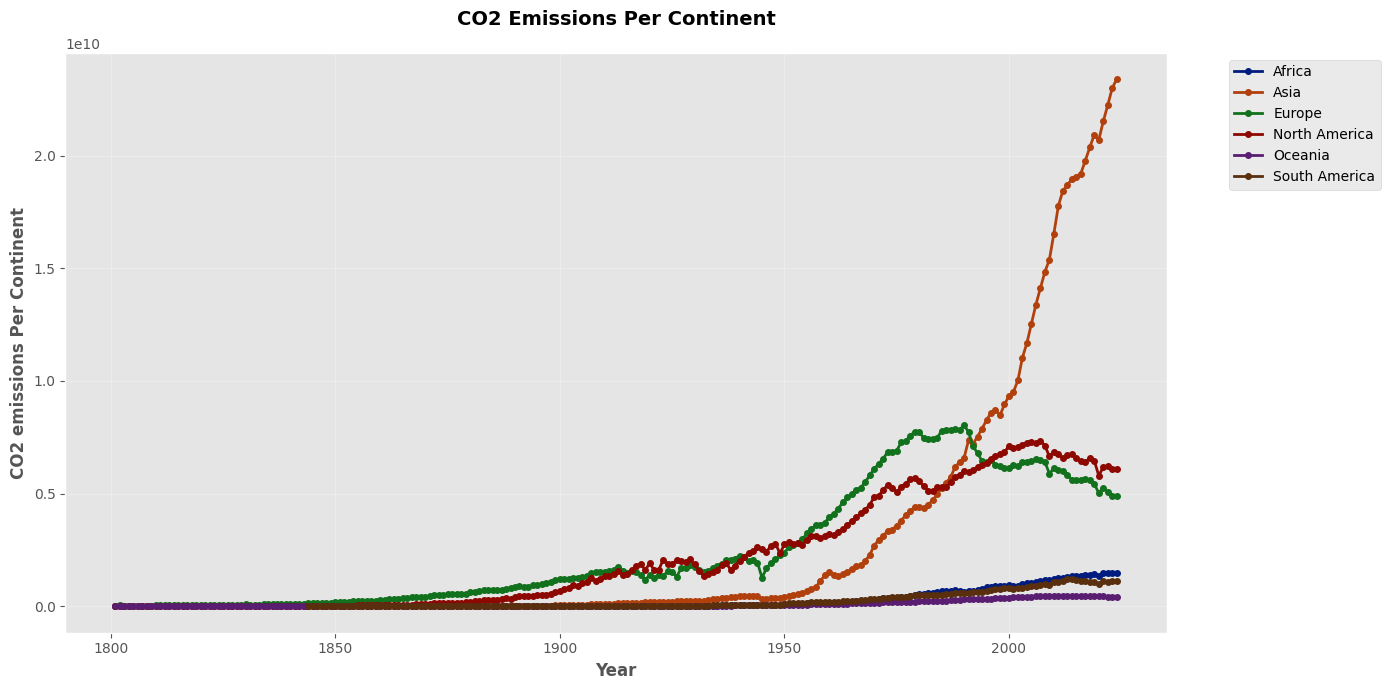

In [35]:
fig, ax = plt.subplots(figsize=(14, 7))
entities = df_co2_emissions_per_continent['Entity'].unique()
colors = sns.color_palette("dark", len(entities))
for i, continent in enumerate(entities):
    data = df_co2_emissions_per_continent[df_co2_emissions_per_continent['Entity'] == continent]
    ax.plot(data['Year'], data['CO2 emissions by region'], marker='o', label=continent, linewidth=2, markersize=4, color=colors[i])

ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('CO2 emissions Per Continent', fontsize=12, fontweight='bold')
ax.set_title('CO2 Emissions Per Continent', fontsize=14, fontweight='bold', pad=20)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True, fontsize=10)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 3.2 Emissions Per Capita by Continent 

In [19]:
df_co2_emissions_per_capita_by_continents.columns

Index(['Entity', 'Code', 'Year', 'CO2 emissions per capita'], dtype='str')

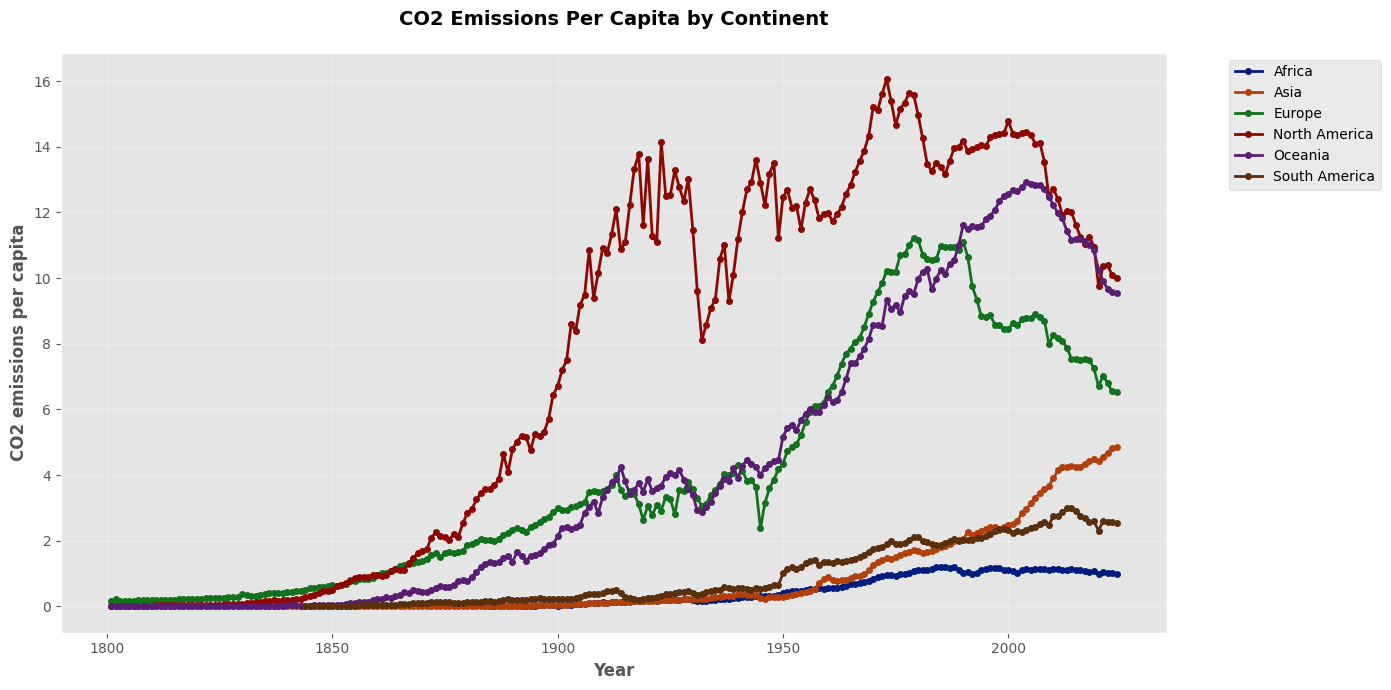

In [29]:
fig, ax = plt.subplots(figsize=(14, 7))
entities = df_co2_emissions_per_capita_by_continents['Entity'].unique()
colors = sns.color_palette("dark", len(entities))
for i, continent in enumerate(entities):
    data = df_co2_emissions_per_capita_by_continents[df_co2_emissions_per_capita_by_continents['Entity'] == continent]
    ax.plot(data['Year'], data['CO2 emissions per capita'], marker='o', label=continent, linewidth=2, markersize=4, color=colors[i])

ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('CO2 emissions per capita', fontsize=12, fontweight='bold')
ax.set_title('CO2 Emissions Per Capita by Continent', fontsize=14, fontweight='bold', pad=20)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True, fontsize=10)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 3.3 Emissions Per Capita by Income Level 

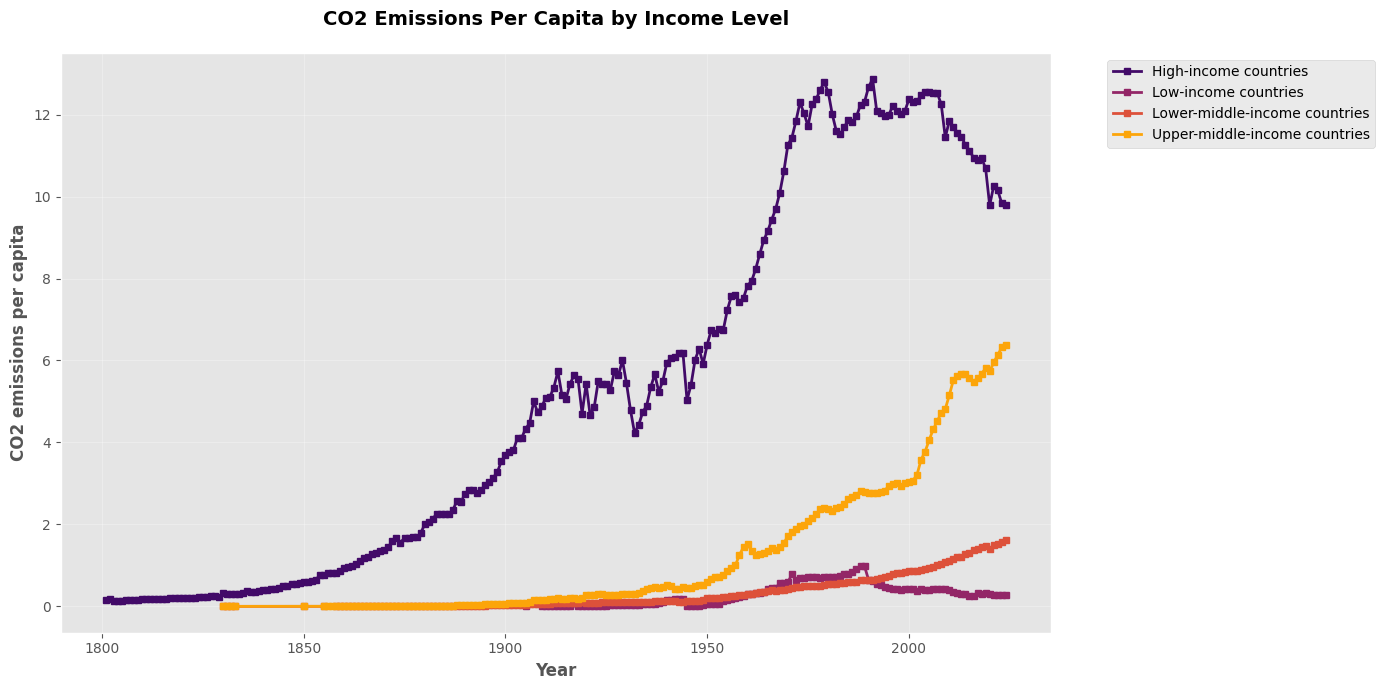

In [78]:
fig, ax = plt.subplots(figsize=(14, 7))
entities = df_co2_emissions_per_capita_by_income['Entity'].unique()
colors = sns.color_palette("inferno", len(entities))
for i, income_group in enumerate(entities):
    data = df_co2_emissions_per_capita_by_income[df_co2_emissions_per_capita_by_income['Entity'] == income_group]
    ax.plot(data['Year'], data['CO2 emissions per capita'], marker='s', label=income_group, linewidth=2, markersize=5, color=colors[i])

ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('CO2 emissions per capita', fontsize=12, fontweight='bold')
ax.set_title('CO2 Emissions Per Capita by Income Level', fontsize=14, fontweight='bold', pad=20)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True, fontsize=10)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()